### please install package

pip install pyod            # normal install
pip install --upgrade pyod  # or update if needed

!pip install pyod or conda install -c conda-forge pyod

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

In [6]:
cn7_Y = pd.read_csv('./train_normal.csv', index_col=0)
cn7_Y
cn7_N = pd.read_csv('./test.csv',index_col=0)
cn7_N

,PassOrFail,Injection_Time,Filling_Time,Plasticizing_Time,Cycle_Time,Clamp_Close_Time,Cushion_Position,Plasticizing_Position,Clamp_Open_Position,Max_Injection_Speed,...,Average_Back_Pressure,Barrel_Temperature_1,Barrel_Temperature_2,Barrel_Temperature_3,Barrel_Temperature_4,Barrel_Temperature_5,Barrel_Temperature_6,Hopper_Temperature,Mold_Temperature_3,Mold_Temperature_4
23,1,9.58,4.47,16.889999,59.520000,7.13,653.409973,68.839996,647.98999,55.400002,...,59.400002,276.100006,275.200012,275.100006,271.399994,255.199997,230.199997,67.800003,25.000000,27.500000
57,1,9.45,4.33,16.959999,59.580002,7.13,653.400024,68.839996,647.98999,60.700001,...,59.099998,275.299988,275.299988,275.100006,269.799988,255.000000,230.100006,68.000000,25.000000,27.700001
58,1,9.45,4.33,16.930000,59.419998,7.13,653.400024,68.839996,647.98999,60.900002,...,58.700001,276.700012,274.899994,274.899994,270.399994,254.899994,229.800003,67.000000,25.100000,27.700001
59,1,9.44,4.33,16.920000,59.439999,7.13,653.400024,68.860001,647.98999,60.799999,...,58.799999,276.000000,275.200012,274.799988,271.100006,254.699997,229.800003,67.000000,25.100000,27.600000
639,1,13.39,8.27,16.650000,59.560001,7.12,653.630005,68.589996,647.98999,38.500000,...,59.700001,275.799988,275.299988,275.299988,270.000000,255.699997,229.699997,64.400002,20.400000,21.700001
642,1,10.83,5.72,16.820000,62.360001,7.18,653.390015,68.580002,647.98999,45.400002,...,87.099998,276.000000,274.799988,275.700012,268.899994,255.199997,229.800003,63.799999,20.600000,21.799999
643,1,11.49,6.37,16.750000,62.360001,7.18,653.429993,68.589996,647.98999,45.099998,...,62.900002,275.200012,275.500000,274.899994,272.100006,255.199997,230.100006,64.300003,20.500000,21.799999
644,1,9.98,4.87,16.530001,60.459999,7.12,653.409973,68.610001,647.98999,49.400002,...,67.400002,276.000000,275.299988,275.100006,271.600006,255.199997,229.600006,65.000000,20.700001,22.000000
645,1,9.70,4.58,16.469999,58.959999,7.12,653.450012,68.589996,647.98999,53.299999,...,60.200001,276.799988,275.100006,275.700012,270.899994,255.399994,229.399994,64.500000,20.600000,21.900000
1769,1,9.60,4.48,16.580000,59.520000,7.11,653.429993,68.360001,647.98999,55.000000,...,59.900002,277.299988,275.200012,274.899994,271.500000,255.100006,230.100006,65.300003,22.200001,24.000000


In [7]:
# 양품
cn7_Y.drop(['PassOrFail'] ,axis=1, inplace=True)

# 불량
cn7_N.drop(['PassOrFail'] ,axis=1, inplace=True)

In [8]:
scaler = MinMaxScaler()

# 양품
cn7_Y = scaler.fit_transform(cn7_Y)

# 불량
cn7_N = scaler.fit_transform(cn7_N)

In [9]:
cn7_train_Y = cn7_Y[:4000]
cn7_test_Y = cn7_Y[4000:]
cn7_test_N = cn7_N

print('CN7의 양품 학습 데이터셋 개수:', len(cn7_train_Y))
print('CN7의 양품 검증 데이터셋 개수:', len(cn7_test_Y))
print('CN7의 불량 검증 데이터셋 개수:', len(cn7_test_N))

CN7의 양품 학습 데이터셋 개수: 4000
CN7의 양품 검증 데이터셋 개수: 2697
CN7의 불량 검증 데이터셋 개수: 39


### original

In [10]:
test = np.concatenate([cn7_test_Y, cn7_test_N], axis = 0)


In [11]:
y_train = np.zeros(len(cn7_train_Y))

In [12]:
y_test = np.concatenate([np.zeros(len(cn7_test_Y)), np.ones(len(cn7_test_N))])

In [13]:
from pyod.models.deep_svdd import DeepSVDD
from pyod.utils.data import generate_data
from pyod.utils.data import evaluate_print

contamination = 0.001  # percentage of outliers
n_train = 20000  # number of training points
n_test = 2000  # number of testing points
n_features = 300  # number of features
use_ae = False  # hyperparameter for use ae architecture instead of simple NN
random_state = 10  # if C is set to None use random_state

clf_name = 'DeepSVDD'
clf = DeepSVDD(use_ae=use_ae, epochs=30, contamination=contamination)
clf.fit(cn7_train_Y)

# get the prediction labels and outlier scores of the training data
y_train_pred = clf.labels_  # binary labels (0: inliers, 1: outliers)
y_train_scores = clf.decision_scores_  # raw outlier scores

# get the prediction on the test data
y_test_pred = clf.predict(test)  # outlier labels (0 or 1)
y_test_scores = clf.decision_function(test)  # outlier scores

# evaluate and print the results
print("\nOn Test Data:")
evaluate_print(clf_name, y_test, y_test_scores)

2022-12-03 13:12:43.033062: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:12:43.033448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:12:43.070320: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:12:43.070635: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-03 13:12:43.070871: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:936] successful NUMA node read from S

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 dense_1 (Dense)             (None, 64)                1536      
                                                                 
 net_output (Dense)          (None, 32)                2048      
                                                                 
 tf.math.subtract_1 (TFOpLam  (None, 32)               0         
 bda)                                                            
                                                                 
 tf.math.pow_1 (TFOpLambda)  (None, 32)                0         
                                                                 
 tf.math.reduce_sum_1 (TFOpL  (None,)                  0         
 ambda)                                                    

In [14]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_test_pred)  #결과는 아래에서 확인 가능하다.

array([[2691,    6],
       [   0,   39]])

In [15]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print("정확도:", accuracy_score(y_test, y_test_pred))
print("정밀도:", precision_score(y_test, y_test_pred))
print("재현율:", recall_score(y_test, y_test_pred))
print("F1:",f1_score(y_test, y_test_pred)) #결과는 아래에서 확인 가능하다.

정확도: 0.9978070175438597
정밀도: 0.8666666666666667
재현율: 1.0
F1: 0.9285714285714286


## Contaminated test

In [ ]:
### if contaminated test excute this cell and back to original phase

contaminated_data = 4

cn7_train_Y = np.concatenate([cn7_train_Y, cn7_test_N[:contaminated_data]])
cn7_test_N = cn7_test_N[contaminated_data:]

###

## PCA 적용

In [86]:
from pyod.utils.example import visualize

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 주성분을 몇개로 할지 결정
printcipalComponents = pca.fit_transform(cn7_train_Y)
principalDf = pd.DataFrame(data=printcipalComponents, columns = ['principal component1', 'principal component2'])

In [114]:
principalDf

,principal component1,principal component2
0,-0.733588,-0.444409
1,-0.760989,-0.498923
2,-0.751786,-0.484364
3,-0.722213,-0.438105
4,-0.730127,-0.437352
...,...,...
3995,-0.404735,0.412323
3996,-0.385473,0.446231
3997,-0.404844,0.409819
3998,-0.395504,0.429818


In [115]:
printcipalComponents_test = pca.fit_transform(test)
principalDf_test = pd.DataFrame(data=printcipalComponents_test, columns = ['principal component1', 'principal component2'])

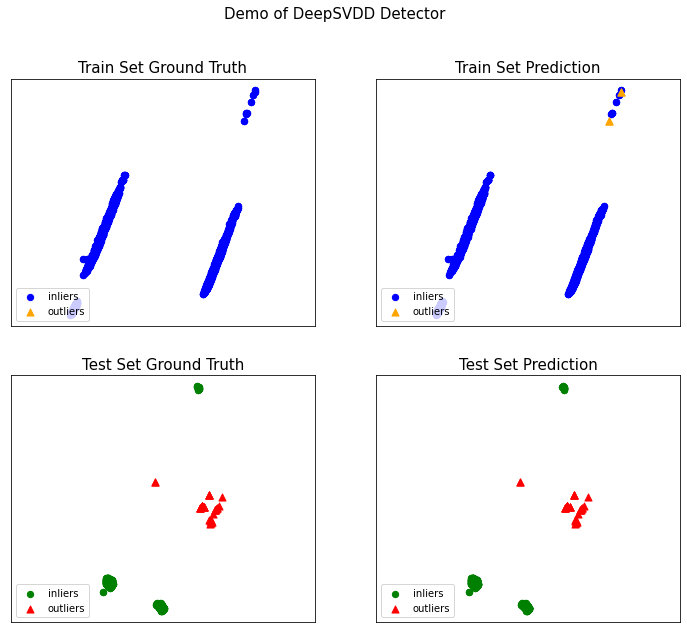

In [117]:
visualize(clf_name, principalDf, y_train, principalDf_test, y_test, y_train_pred,
    y_test_pred, show_figure=True, save_figure=False)

In [ ]:
### The END